In [78]:
import _init_paths
import numpy as np
import matplotlib.pyplot as plt
import nengo, nengo_loihi

from utils.results_analysis_utils.analyse_results import get_loihi_probes_output

In [79]:
loihi_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/nengo_loihi_otpts/"
           "Layer_probes_otpt_batch_start_0_end_10.npy", allow_pickle=True)

loihi_otpt = get_loihi_probes_output(loihi_otpt, 50)
print(loihi_otpt.keys())
loihi_otpt = loihi_otpt["conv2d_2.0"]
print(loihi_otpt[0].shape)

dict_keys(['conv2d_2.0'])
(50, 2704)


In [81]:
ndl_otpt = np.load("/homes/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/ndl_train_test_results/"
                   "ndl_test_only_results/sim_lyr_probes_otpt.npy", allow_pickle=True)
ndl_otpt = ndl_otpt.item()
ndl_otpt = ndl_otpt["conv2d_5.0"]
#print(ndl_otpt[0].shape)

dict_keys(['max_pooling2d'])


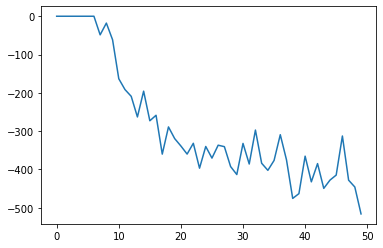

In [67]:
neuron_index = 1836 #1383
plt.plot(ndl_otpt[0][:, neuron_index])

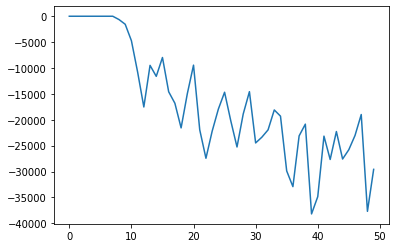

In [68]:
plt.plot(loihi_otpt[0][:, neuron_index])

# SCATTER PLOTS 

0 Correlation: [[1.         0.87917134]
 [0.87917134 1.        ]]
1 Correlation: [[1.         0.86950324]
 [0.86950324 1.        ]]
2 Correlation: [[1.         0.85317914]
 [0.85317914 1.        ]]
3 Correlation: [[1.         0.88088483]
 [0.88088483 1.        ]]
4 Correlation: [[1.         0.87084975]
 [0.87084975 1.        ]]
5 Correlation: [[1.         0.85757447]
 [0.85757447 1.        ]]
6 Correlation: [[1.         0.84487786]
 [0.84487786 1.        ]]
7 Correlation: [[1.         0.87114173]
 [0.87114173 1.        ]]
8 Correlation: [[1.         0.88069539]
 [0.88069539 1.        ]]
9 Correlation: [[1.         0.83515211]
 [0.83515211 1.        ]]


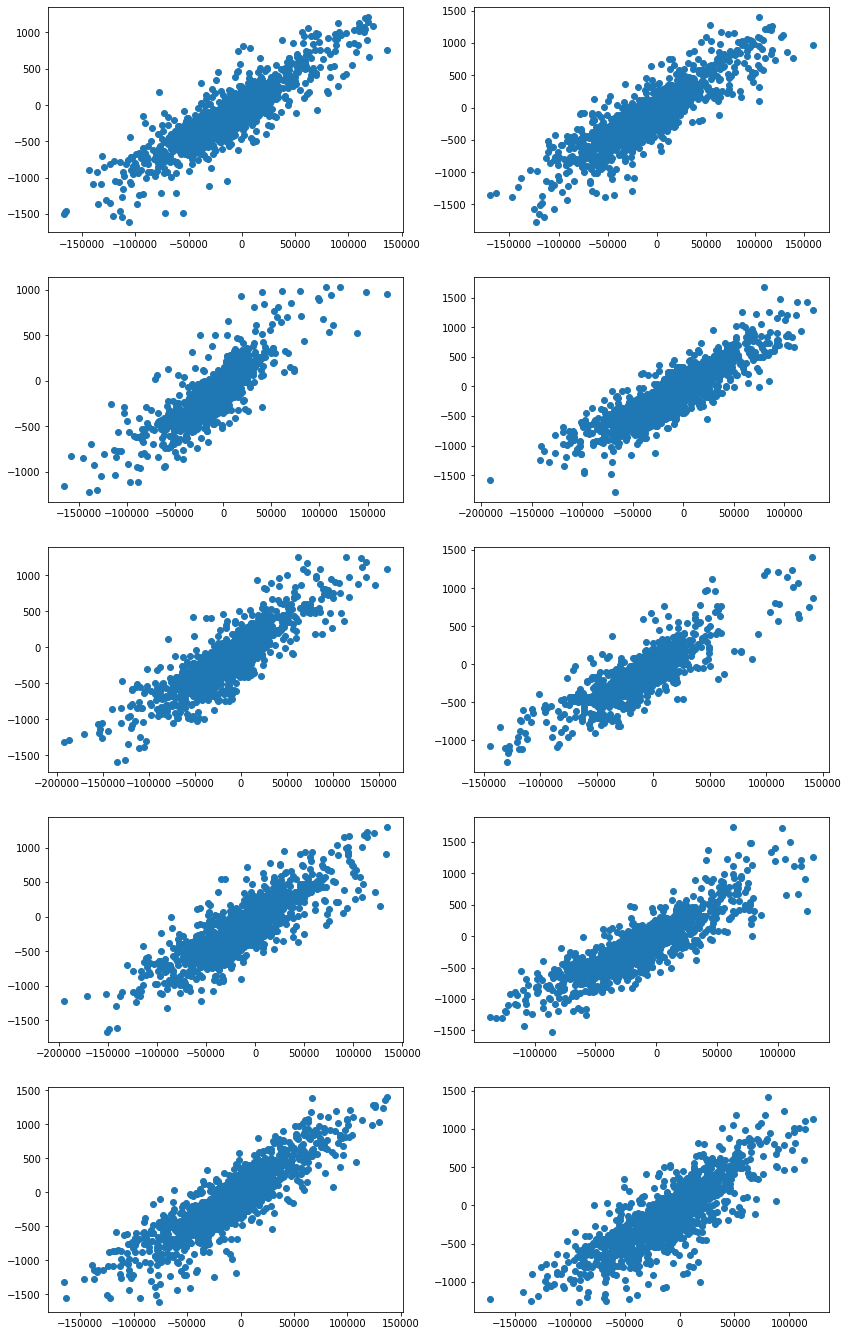

In [73]:
fig, axs = plt.subplots(5, 2, figsize=(14, 24))
for i in range(10): # Number of Test Images.
  row, col = i // 2, i % 2
  axs[row, col].scatter(np.mean(loihi_otpt[i][-1:, :], axis=0),
                       np.mean(ndl_otpt[i][-1:, :], axis=0))
  print(i, "Correlation: %s" % np.corrcoef(np.mean(loihi_otpt[i][-1:, :], axis=0), np.mean(ndl_otpt[i][-1:, :], axis=0)))

Covariance: [[1.48753693e+09 1.24008181e+07]
 [1.24008181e+07 1.34230510e+05]]
Correlation: [[1.         0.87758833]
 [0.87758833 1.        ]]


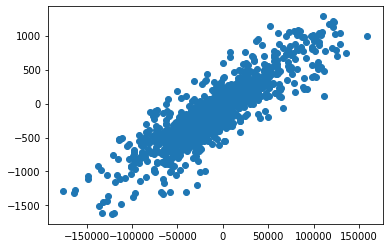

In [70]:
plt.scatter(np.mean(loihi_otpt[1][-5:, :], axis=0), 
            np.mean(ndl_otpt[1][-5:, :], axis=0))

print("Covariance: {}".format(np.cov(np.mean(loihi_otpt[1][-5:, :], axis=0), np.mean(ndl_otpt[1][-5:, :], axis=0))))
print("Correlation: %s" % np.corrcoef(np.mean(loihi_otpt[1][-5:, :], axis=0), np.mean(ndl_otpt[1][-5:, :], axis=0)))

# ################################################################

In [111]:
with nengo.Network(seed=0) as net:
  inp = nengo.Node(1)
  ens1 = nengo.Ensemble(1, dimensions=1, encoders=[[1]], max_rates=[250], 
                        neuron_type=nengo_loihi.neurons.LoihiSpikingRectifiedLinear())
  ens2 = nengo.Ensemble(1, dimensions=1, encoders=[[1]], max_rates=[250],
                       neuron_type=nengo_loihi.neurons.LoihiSpikingRectifiedLinear())
  nengo.Connection(inp, ens1, synapse=None)
  nengo.Connection(ens1, ens2, synapse=0.005)
  
  ens2_probe = nengo.Probe(ens2.neurons, attr="input")
  ens1_probe = nengo.Probe(ens1.neurons, synapse=0.005)
  ens2_probe_otp = nengo.Probe(ens2.neurons, synapse=0.005)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

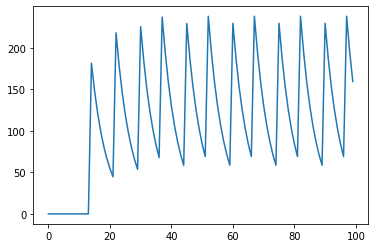

In [112]:
with nengo.Simulator(net, seed=0) as sim:
  sim.run(0.1)
  
#plt.plot(sim.data[ens2_probe])
# plt.plot(sim.data[ens1_probe])
plt.plot(sim.data[ens2_probe_otp])

In [113]:
with nengo_loihi.Simulator(net, target="loihi", seed=0) as loihi_sim:
  loihi_sim.run(0.1)

INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 10.212.98.178:34413
INFO:DRV:      Host server up..............Done 1.06s
INFO:DRV:      Encoding axons/synapses.....Done 3.19ms
INFO:DRV:      Compiling Embedded snips....Done 0.32s
INFO:DRV:      Compiling MPDS Registers....Done 0.78ms
INFO:HST:  Args chip=0 cpu=0 /homes/rgaurav/nxsdk_1_nengo_loihi/lib/python3.8/site-packages/nxsdk/driver/compilers/../../../temp/1625959074.6739228/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 
INFO:HST:  Nx...
INFO:DRV:      Booting up..................Done 1.13s
INFO:DRV:      Encoding probes.............Done 0.71ms
INFO:DRV:      Transferring probes.........Done 0.11s
INFO:DRV:      Configuring registers.......Done 0.05s
INFO:DRV:      Transferring spikes.........Done 8.24ms
INFO:DRV:      Executing...................Done 0.02s
INFO:DRV:      Processing timeseries.......Done 0.01s
INFO:DRV:  Executor: 100 timesteps.........Done 0.21s
INFO:HST:  chip=0 cpu=0 halted, status=0x0

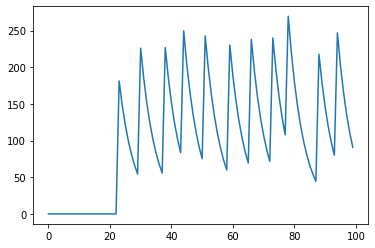

In [114]:
#plt.plot(loihi_sim.data[ens2_probe])
# plt.plot(loihi_sim.data[ens1_probe])
plt.plot(loihi_sim.data[ens2_probe_otp])

# #############################################################

Covariance: [[841.66666667 841.66666667]
 [841.66666667 841.66666667]]
Explicit Covariance calculation: 841.6666666666666
Correlation: [[1. 1.]
 [1. 1.]]


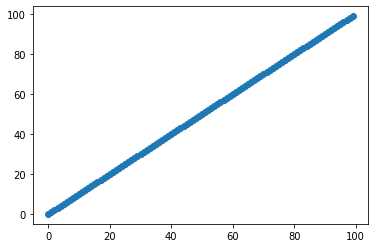

In [57]:
k1 = np.arange(0, 100)
k2 = np.arange(0, 100)

plt.scatter(k1, k2)
print("Covariance: {}".format(np.cov(k1, k2)))
print("Explicit Covariance calculation: %s" % (np.sum((k1 - np.mean(k1)) * (k2 - np.mean(k2)))/(k1.shape[0]-1)))
print("Correlation: %s" % np.corrcoef(k1, k2))

Covariance: [[841.66666667 841.66666667]
 [841.66666667 841.66666667]]
Explicit Covariance calculation: 841.6666666666666
Correlation: [[1. 1.]
 [1. 1.]]


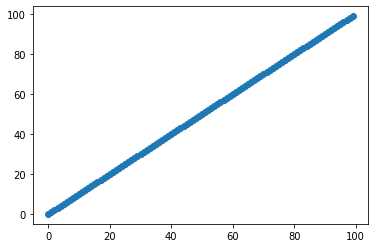

In [64]:
k1 = np.arange(0, 100)
k2 = np.arange(0, 100)*1

plt.scatter(k1, k2)
print("Covariance: {}".format(np.cov(k1, k2)))
print("Explicit Covariance calculation: %s" % (np.sum((k1 - np.mean(k1)) * (k2 - np.mean(k2)))/(k1.shape[0]-1)))
print("Correlation: %s" % np.corrcoef(k1, k2))

Covariance: [[841.66666667 841.66666667]
 [841.66666667 841.66666667]]
Explicit Covariance calculation: 841.6666666666666
Correlation: [[1. 1.]
 [1. 1.]]


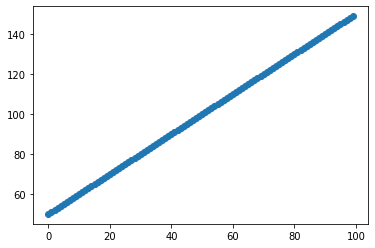

In [60]:
k1 = np.arange(0, 100)
k2 = np.arange(0, 100)+50

plt.scatter(k1, k2)
print("Covariance: {}".format(np.cov(k1, k2)))
print("Explicit Covariance calculation: %s" % (np.sum((k1 - np.mean(k1)) * (k2 - np.mean(k2)))/(k1.shape[0]-1)))
print("Correlation: %s" % np.corrcoef(k1, k2))